# Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape)

(545, 13)


In [4]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [7]:
#4 Check for missing  values if any, replace with appropriate values
df=pd.DataFrame(df)
# Check for missing values
print(df.isnull().sum()) # Count of missing values per column 

# filling missing values
#df_filled = df.fillna(df.mean())  # Replace NaNs with column mean


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
#5 Prepare  X (independent variables) and y (dependent variable)
features=["price","area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"]
target=["price"]
x=df[features] #Independent variable
y=df[target] #dependent variable

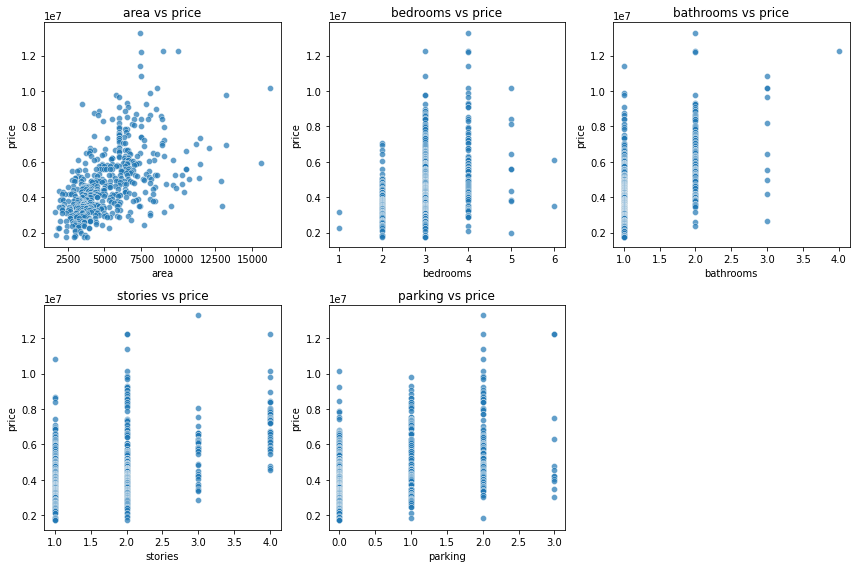

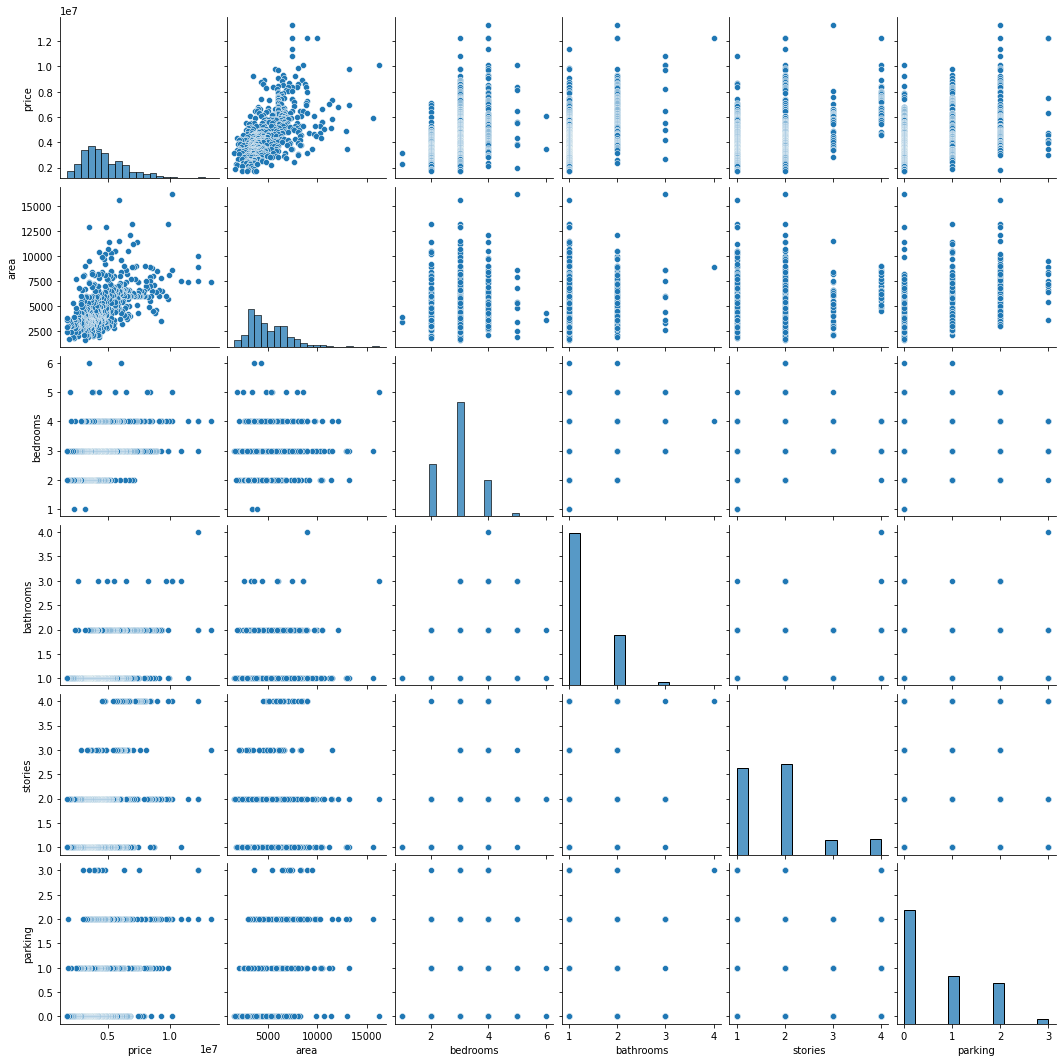

In [18]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset

# Selecting only numerical features
numerical_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

# Create scatterplots for each numerical feature vs. price
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Arranging in a grid (2 rows, 3 columns)
    sns.scatterplot(x=df[col], y=df[target], alpha=0.7)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{col} vs {target}")

plt.tight_layout()
plt.show()

# Selecting numerical features + target for pairplot (categorical features are excluded)
selected_features = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]

# Pairplot for numerical variables
sns.pairplot(df[selected_features])


# Create boxplots for each categorical feature vs. price
# plt.figure(figsize=(12, 8))

# for i, col in enumerate(categorical_features, 1):
#     plt.subplot(3, 3, i)  # Arranging in a grid
#     sns.boxplot(x=df[col], y=df[target])
#     plt.xlabel(col)
#     plt.ylabel(target)
#     plt.title(f"{col} vs {target}")

# plt.tight_layout()
# plt.show()


In [23]:
#7 Encoding categorical data in X
# List of categorical features
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

# Merge with numerical features
numerical_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
X_final = pd.concat([df[numerical_features], X_encoded], axis=1)

# Display encoded dataset
# print(X_final.head())
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [3]:
#8  Avoiding the Dummy Variable Trap

import pandas as pd

# Load the dataset
housing_df = pd.read_csv("Housing.csv")

# Identify categorical variables
categorical_cols = housing_df.select_dtypes(include=['object']).columns

# Apply one-hot encoding while avoiding the dummy variable trap
housing_df = pd.get_dummies(housing_df, columns=categorical_cols, drop_first=True)

# Display the first few rows
print(housing_df.head())


      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

In [5]:
#9 Apply feature scaling on numerical variables

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
housing_df = pd.read_csv("Housing.csv")

# Identify numerical variables
numerical_cols = housing_df.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaling
scaler = StandardScaler()
housing_df[numerical_cols] = scaler.fit_transform(housing_df[numerical_cols])

# Display the first few rows after scaling
print(housing_df.head())


      price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  4.566365  1.046726  1.403419   1.421812  1.378217      yes        no   
1  4.004484  1.757010  1.403419   5.405809  2.532024      yes        no   
2  4.004484  2.218232  0.047278   1.421812  0.224410      yes        no   
3  3.985755  1.083624  1.403419   1.421812  0.224410      yes        no   
4  3.554979  1.046726  1.403419  -0.570187  0.224410      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea furnishingstatus  
0       no              no             yes  1.517692      yes        furnished  
1       no              no             yes  2.679409       no        furnished  
2      yes              no              no  1.517692      yes   semi-furnished  
3      yes              no             yes  2.679409      yes        furnished  
4      yes              no             yes  1.517692       no        furnished  


In [6]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
housing_df = pd.read_csv("Housing.csv")

# Identify numerical variables
numerical_cols = housing_df.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaling
scaler = StandardScaler()
housing_df[numerical_cols] = scaler.fit_transform(housing_df[numerical_cols])

# Identify target variable (assuming 'price' is the target column; modify if needed)
target_column = 'price'  # Change this to your actual target column
X = housing_df.drop(columns=[target_column])
y = housing_df[target_column]

# Split data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display dataset shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (381, 12)
y_train shape: (381,)
X_test shape: (164, 12)
y_test shape: (164,)


In [8]:
#11 Fitting Multiple Linear Regression to the Training

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load the dataset
housing_df = pd.read_csv("Housing.csv")

# Identify categorical variables and apply one-hot encoding (avoiding dummy variable trap)
categorical_cols = housing_df.select_dtypes(include=['object']).columns
housing_df = pd.get_dummies(housing_df, columns=categorical_cols, drop_first=True)

# Identify numerical variables
numerical_cols = housing_df.select_dtypes(include=['int64', 'float64']).columns

# Apply Standard Scaling to numerical features
scaler = StandardScaler()
housing_df[numerical_cols] = scaler.fit_transform(housing_df[numerical_cols])

# Define target variable (assuming 'price' is the target column; modify if needed)
target_column = 'price'  # Change this to the actual target column name
X = housing_df.drop(columns=[target_column])
y = housing_df[target_column]

# Split data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Multiple Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Print model coefficients
print("Intercept:", regressor.intercept_)
print("Coefficients:", regressor.coef_)


Intercept: -0.3901453622274432
Coefficients: [ 0.29387159  0.03191993  0.29946361  0.19352482  0.13962296  0.21837036
  0.14753955  0.25825313  0.3298378   0.36700967  0.27248133 -0.06509936
 -0.20933615]


In [9]:
#12 Predict on the train set and calculate the error = y_pred - y_train

# Predict on the training set
y_train_pred = regressor.predict(X_train)

# Calculate the error
train_error = y_train_pred - y_train

# Display first few errors
print("First few prediction errors:")
print(train_error.head())


First few prediction errors:
126   -0.310951
363   -0.058774
370    0.434597
31    -1.030769
113    0.123184
Name: price, dtype: float64


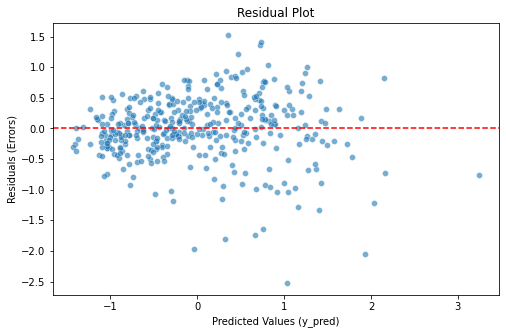

In [10]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=train_error, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Add horizontal line at 0
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()


In [11]:
#14  Predic on the test set
# Predict on the test set
y_test_pred = regressor.predict(X_test)

# Display first few predictions
print("First few predictions on the test set:")
print(y_test_pred[:10])  # Display first 10 predicted values


First few predictions on the test set:
[ 0.3240627   1.23213123 -0.89228774 -0.1285812  -0.79474367 -0.62998859
  0.51473447  0.88624608 -1.05358522 -1.18389481]


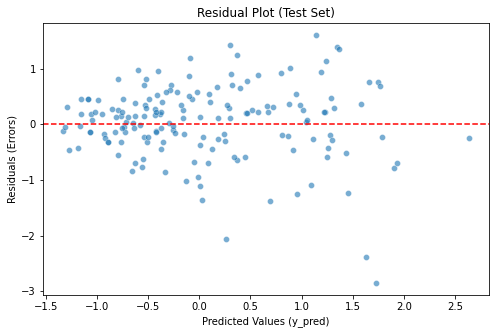

In [12]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (errors) for the test set
test_error = y_test_pred - y_test

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=test_error, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Zero-error reference line
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot (Test Set)")
plt.show()



In [13]:
#16 Print Mean Squared Error and R Squared Value

from sklearn.metrics import mean_squared_error, r2_score

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Compute R-squared (R²) value
r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²) Value: {r2:.4f}")


Mean Squared Error (MSE): 0.4361
R-squared (R²) Value: 0.6463


In [14]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
# Function to calculate Adjusted R Squared
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Select a subset of features (example: choosing only first 5 features)
selected_features = X_train.columns[:5]  # Modify this to select different numbers of features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train new Linear Regression model with selected features
regressor_selected = LinearRegression()
regressor_selected.fit(X_train_selected, y_train)

# Predict on the test set
y_test_pred_selected = regressor_selected.predict(X_test_selected)

# Compute R-squared for selected features
r2_selected = r2_score(y_test, y_test_pred_selected)

# Compute Adjusted R-squared
n = X_test_selected.shape[0]  # Number of observations
p = X_test_selected.shape[1]  # Number of selected independent variables
adjusted_r2_value = adjusted_r2(r2_selected, n, p)

# Print results
print(f"R-squared (R²) for selected features: {r2_selected:.4f}")
print(f"Adjusted R-squared: {adjusted_r2_value:.4f}")


R-squared (R²) for selected features: 0.5253
Adjusted R-squared: 0.5103
